# Text-Guided Editing of Images (Using CLIP and StyleGAN)

In [1]:
#@title Setup (may take a few minutes)
!git clone https://github.com/Jerry2001/StyleCLIP.git

import os

os.chdir(f'./StyleCLIP')

`itall ftfy regex tqdm
\
!p\p install wav2clip!pip install librosa

2
A

\henticate and create the PyDrive client.```
hauthenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# downloads StyleGAN's weights and facial recognition network weights
ids = ['1EM87UquaoQmk17Q8d5kYIAHqu0dkYqdT', '1N0MZSqPRJpLfP4mFQCS14ikrVSe8vQlL']
for file_id in ids:
  downloaded = drive.CreateFile({'id':file_id})
  downloaded.FetchMetadata(fetch_all=True)
  downloaded.GetContentFile(downloaded.metadata['title'])

Cloning into 'StyleCLIP'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 611 (delta 58), reused 115 (delta 43), pack-reused 461
Receiving objects: 100% (611/611), 164.46 MiB | 22.36 MiB/s, done.
Resolving deltas: 100% (194/194), done.
     |████████████████████████████████| 53 kB 1.7 MB/s 
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-9pycutwe
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-9pycutwe
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369221 sha256=a2ca854c294f6d3f67f60338fbd37e2cde50fcb266ba2f5255c07de2af1f9322
  Stored in directory: /tmp/pip-ephem-wheel-cache-05rnpf3z/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [6]:
import os
os.chdir(f'./StyleCLIP')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from tqdm import tqdm


In [7]:
experiment_type = 'free_generation' #@param ['edit', 'free_generation']

description = 'A person with purple hair' #@param {type:"string"}

latent_path = None #@param {type:"string"}

optimization_steps =  61#@param {type:"number"}

l2_lambda = 0.008 #@param {type:"number"}

id_lambda = 0.005 #@param {type:"number"}

stylespace = True #@param {type:"boolean"}

create_video = False #@param {type:"boolean"}


In [8]:
use_seed = True #@param {type:"boolean"}

seed =  0#@param {type: "number"}

In [9]:
#@title Additional Arguments
args = {
    "description": description,
    "ckpt": "stylegan2-ffhq-config-f.pt",
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "results_dir": "results",
    "ir_se50_weights": "model_ir_se50.pth",
    "audio":"welcome-to-the-internet.wav"
}

# Generate

## Female

In [10]:
import torch
from optimization.run_optimization import main
from argparse import Namespace

In [11]:
female_list = os.listdir("../drive/MyDrive/Common_Voice/female_100")

In [12]:
female_list = female_list[:30]
female_list.sort()

In [ ]:
for path in tqdm(female_list):
  args["audio"] = "../drive/MyDrive/Common_Voice/female_100/" + path
  if use_seed:
    torch.manual_seed(seed)
  result = main(Namespace(**args))
  image_path = "../drive/MyDrive/Common_Voice/female_imgs/" + path.split('.')[0] + '_60s.jpg'
  ! mv results/00060.jpg $image_path

## Male

In [14]:
male_list = os.listdir("../drive/MyDrive/Common_Voice/male_100")

In [15]:
male_list.sort()

In [16]:
for path in tqdm(male_list):
  args["audio"] = "../drive/MyDrive/Common_Voice/male_100/" + path
  if use_seed:
    torch.manual_seed(seed)
  result = main(Namespace(**args))
  image_path = "../drive/MyDrive/Common_Voice/male_imgs/" + path.split('.')[0] + '_60s.jpg'
  ! mv results/00060.jpg $image_path

  0%|          | 0/100 [00:00<?, ?it/s]

Loading ResNet ArcFace



loss: 1.0029;:   0%|          | 0/61 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)

  1%|          | 1/100 [00:41<1:09:06, 41.89s/it]

Loading ResNet ArcFace



  2%|▏         | 2/100 [01:23<1:08:26, 41.90s/it]

Loading ResNet ArcFace



  3%|▎         | 3/100 [02:05<1:07:44, 41.90s/it]

Loading ResNet ArcFace



  4%|▍         | 4/100 [02:47<1:06:48, 41.76s/it]

Loading ResNet ArcFace



  5%|▌         | 5/100 [03:29<1:06:09, 41.79s/it]

Loading ResNet ArcFace



  6%|▌         | 6/100 [04:10<1:05:28, 41.79s/it]

Loading ResNet ArcFace



  7%|▋         | 7/100 [04:52<1:04:46, 41.79s/it]

Loading ResNet ArcFace



  8%|▊         | 8/100 [05:34<1:04:07, 41.82s/it]

Loading ResNet ArcFace



  9%|▉         | 9/100 [06:16<1:03:26, 41.83s/it]

Loading ResNet ArcFace



 10%|█         | 10/100 [06:58<1:02:51, 41.90s/it]

Loading ResNet ArcFace



 11%|█         | 11/100 [07:40<1:02:06, 41.87s/it]

Loading ResNet ArcFace



 12%|█▏        | 12/100 [08:21<1:01:18, 41.80s/it]

Loading ResNet ArcFace



 13%|█▎        | 13/100 [09:04<1:00:45, 41.90s/it]

Loading ResNet ArcFace



 14%|█▍        | 14/100 [09:46<1:00:09, 41.97s/it]

Loading ResNet ArcFace



 15%|█▌        | 15/100 [10:27<59:22, 41.91s/it]  

Loading ResNet ArcFace



 16%|█▌        | 16/100 [11:09<58:34, 41.84s/it]

Loading ResNet ArcFace



 17%|█▋        | 17/100 [11:51<58:00, 41.93s/it]

Loading ResNet ArcFace



 18%|█▊        | 18/100 [12:33<57:18, 41.94s/it]

Loading ResNet ArcFace



 19%|█▉        | 19/100 [13:15<56:37, 41.95s/it]

Loading ResNet ArcFace



 20%|██        | 20/100 [13:57<56:00, 42.01s/it]

Loading ResNet ArcFace



 21%|██        | 21/100 [14:39<55:21, 42.05s/it]

Loading ResNet ArcFace



 22%|██▏       | 22/100 [15:22<54:41, 42.07s/it]

Loading ResNet ArcFace



 23%|██▎       | 23/100 [16:04<54:05, 42.15s/it]

Loading ResNet ArcFace



 24%|██▍       | 24/100 [16:46<53:16, 42.06s/it]

Loading ResNet ArcFace



 25%|██▌       | 25/100 [17:28<52:31, 42.02s/it]

Loading ResNet ArcFace



 26%|██▌       | 26/100 [18:10<51:51, 42.05s/it]

Loading ResNet ArcFace



 27%|██▋       | 27/100 [18:52<51:15, 42.13s/it]

Loading ResNet ArcFace



 28%|██▊       | 28/100 [19:34<50:33, 42.13s/it]

Loading ResNet ArcFace



 29%|██▉       | 29/100 [20:16<49:51, 42.14s/it]

Loading ResNet ArcFace



 30%|███       | 30/100 [20:59<49:14, 42.20s/it]

Loading ResNet ArcFace



 31%|███       | 31/100 [21:41<48:34, 42.23s/it]

Loading ResNet ArcFace



 32%|███▏      | 32/100 [22:23<47:50, 42.21s/it]

Loading ResNet ArcFace



 33%|███▎      | 33/100 [23:06<47:09, 42.23s/it]

Loading ResNet ArcFace



 34%|███▍      | 34/100 [23:48<46:23, 42.17s/it]

Loading ResNet ArcFace



 35%|███▌      | 35/100 [24:30<45:43, 42.21s/it]

Loading ResNet ArcFace



 36%|███▌      | 36/100 [25:12<45:04, 42.26s/it]

Loading ResNet ArcFace



 37%|███▋      | 37/100 [25:55<44:34, 42.45s/it]

Loading ResNet ArcFace



 38%|███▊      | 38/100 [26:38<43:55, 42.51s/it]

Loading ResNet ArcFace



 39%|███▉      | 39/100 [27:21<43:20, 42.63s/it]

Loading ResNet ArcFace



 40%|████      | 40/100 [28:04<42:45, 42.76s/it]

Loading ResNet ArcFace



 41%|████      | 41/100 [28:47<42:05, 42.80s/it]

Loading ResNet ArcFace



 42%|████▏     | 42/100 [29:29<41:20, 42.77s/it]

Loading ResNet ArcFace



 43%|████▎     | 43/100 [30:12<40:34, 42.71s/it]

Loading ResNet ArcFace



 44%|████▍     | 44/100 [30:54<39:45, 42.61s/it]

Loading ResNet ArcFace



 45%|████▌     | 45/100 [31:37<39:06, 42.66s/it]

Loading ResNet ArcFace



 46%|████▌     | 46/100 [32:19<38:15, 42.51s/it]

Loading ResNet ArcFace



 47%|████▋     | 47/100 [33:02<37:36, 42.57s/it]

Loading ResNet ArcFace



 48%|████▊     | 48/100 [33:45<36:56, 42.62s/it]

Loading ResNet ArcFace



 49%|████▉     | 49/100 [34:27<36:11, 42.59s/it]

Loading ResNet ArcFace



 50%|█████     | 50/100 [35:10<35:31, 42.62s/it]

Loading ResNet ArcFace



 51%|█████     | 51/100 [35:52<34:45, 42.56s/it]

Loading ResNet ArcFace



 52%|█████▏    | 52/100 [36:35<34:00, 42.52s/it]

Loading ResNet ArcFace



 53%|█████▎    | 53/100 [37:18<33:24, 42.65s/it]

Loading ResNet ArcFace



 54%|█████▍    | 54/100 [38:00<32:43, 42.68s/it]

Loading ResNet ArcFace



 55%|█████▌    | 55/100 [38:44<32:06, 42.82s/it]

Loading ResNet ArcFace



 56%|█████▌    | 56/100 [39:26<31:20, 42.74s/it]

Loading ResNet ArcFace



 57%|█████▋    | 57/100 [40:09<30:45, 42.91s/it]

Loading ResNet ArcFace



 58%|█████▊    | 58/100 [40:52<30:01, 42.90s/it]

Loading ResNet ArcFace



 59%|█████▉    | 59/100 [41:35<29:17, 42.88s/it]

Loading ResNet ArcFace



 60%|██████    | 60/100 [42:18<28:40, 43.01s/it]

Loading ResNet ArcFace



 61%|██████    | 61/100 [43:02<27:59, 43.05s/it]

Loading ResNet ArcFace



 62%|██████▏   | 62/100 [43:45<27:15, 43.05s/it]

Loading ResNet ArcFace



 63%|██████▎   | 63/100 [44:28<26:33, 43.07s/it]

Loading ResNet ArcFace



 64%|██████▍   | 64/100 [45:11<25:54, 43.18s/it]

Loading ResNet ArcFace



 65%|██████▌   | 65/100 [45:55<25:15, 43.31s/it]

Loading ResNet ArcFace



 66%|██████▌   | 66/100 [46:38<24:28, 43.20s/it]

Loading ResNet ArcFace



 67%|██████▋   | 67/100 [47:21<23:45, 43.20s/it]

Loading ResNet ArcFace



 68%|██████▊   | 68/100 [48:05<23:06, 43.32s/it]

Loading ResNet ArcFace



 69%|██████▉   | 69/100 [48:48<22:20, 43.24s/it]

Loading ResNet ArcFace



 70%|███████   | 70/100 [49:31<21:37, 43.25s/it]

Loading ResNet ArcFace



 71%|███████   | 71/100 [50:14<20:53, 43.24s/it]

Loading ResNet ArcFace



 72%|███████▏  | 72/100 [50:58<20:13, 43.33s/it]

Loading ResNet ArcFace



 73%|███████▎  | 73/100 [51:41<19:29, 43.33s/it]

Loading ResNet ArcFace



 74%|███████▍  | 74/100 [52:24<18:46, 43.32s/it]

Loading ResNet ArcFace



 75%|███████▌  | 75/100 [53:08<18:03, 43.35s/it]

Loading ResNet ArcFace



 76%|███████▌  | 76/100 [53:51<17:19, 43.32s/it]

Loading ResNet ArcFace



 77%|███████▋  | 77/100 [54:34<16:36, 43.34s/it]

Loading ResNet ArcFace



 78%|███████▊  | 78/100 [55:18<15:53, 43.35s/it]

Loading ResNet ArcFace



 79%|███████▉  | 79/100 [56:01<15:12, 43.45s/it]

Loading ResNet ArcFace



 80%|████████  | 80/100 [56:45<14:28, 43.44s/it]

Loading ResNet ArcFace



 81%|████████  | 81/100 [57:28<13:45, 43.43s/it]

Loading ResNet ArcFace



 82%|████████▏ | 82/100 [58:11<13:01, 43.40s/it]

Loading ResNet ArcFace



 83%|████████▎ | 83/100 [58:55<12:19, 43.48s/it]

Loading ResNet ArcFace



 84%|████████▍ | 84/100 [59:39<11:36, 43.54s/it]

Loading ResNet ArcFace



 85%|████████▌ | 85/100 [1:00:22<10:52, 43.53s/it]

Loading ResNet ArcFace



 86%|████████▌ | 86/100 [1:01:06<10:09, 43.54s/it]

Loading ResNet ArcFace



 87%|████████▋ | 87/100 [1:01:49<09:24, 43.41s/it]

Loading ResNet ArcFace



 88%|████████▊ | 88/100 [1:02:32<08:39, 43.33s/it]

Loading ResNet ArcFace



 89%|████████▉ | 89/100 [1:03:16<07:57, 43.37s/it]

Loading ResNet ArcFace



 90%|█████████ | 90/100 [1:03:59<07:13, 43.38s/it]

Loading ResNet ArcFace



 91%|█████████ | 91/100 [1:04:43<06:30, 43.41s/it]

Loading ResNet ArcFace



 92%|█████████▏| 92/100 [1:05:26<05:47, 43.47s/it]

Loading ResNet ArcFace



 93%|█████████▎| 93/100 [1:06:10<05:04, 43.55s/it]

Loading ResNet ArcFace



 94%|█████████▍| 94/100 [1:06:53<04:21, 43.55s/it]

Loading ResNet ArcFace



 95%|█████████▌| 95/100 [1:07:37<03:37, 43.48s/it]

Loading ResNet ArcFace



 96%|█████████▌| 96/100 [1:08:20<02:54, 43.56s/it]

Loading ResNet ArcFace



 97%|█████████▋| 97/100 [1:09:04<02:10, 43.53s/it]

Loading ResNet ArcFace



 98%|█████████▊| 98/100 [1:09:47<01:27, 43.52s/it]

Loading ResNet ArcFace



 99%|█████████▉| 99/100 [1:10:31<00:43, 43.55s/it]

Loading ResNet ArcFace



100%|██████████| 100/100 [1:11:15<00:00, 42.75s/it]


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)


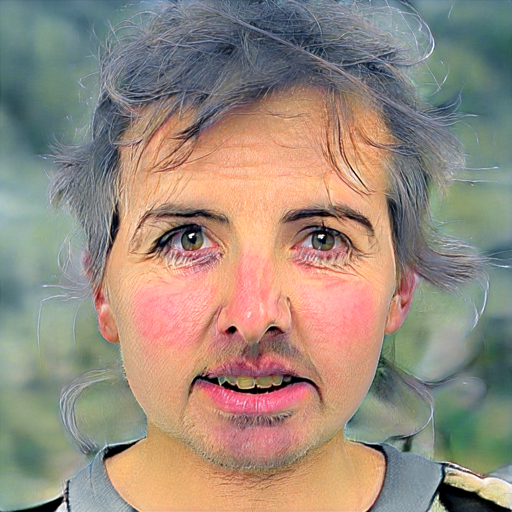

In [19]:
#@title Visualize Result
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

`

In [ ]:
#@title Create and Download Video

!ffmpeg -r 15 -i results/%05d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4
from google.colab import files
files.download('out.mp4')

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>